In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
iris=pd.read_csv('/content/iris.data',sep=',',header=None)

In [10]:
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
labels = {0:'sepal_length',1:'sepal_width',2:'petal_length',3:'petal_width',4:'class'}

In [12]:
iris.rename(columns=labels,
          inplace=True)

In [13]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [16]:
iris['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

<Axes: xlabel='class', ylabel='count'>

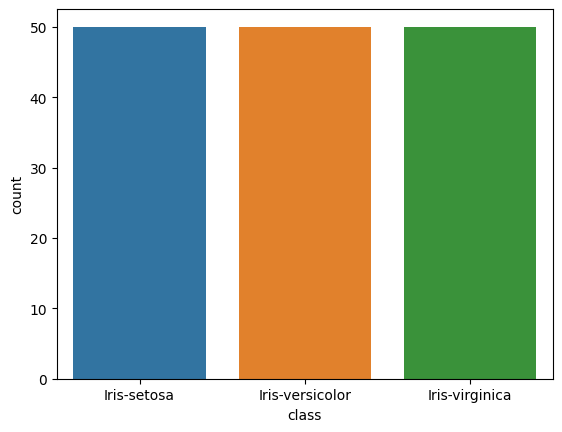

In [19]:
sns.countplot(x='class', data=iris)

In [17]:
iris = iris.sample(frac = 1)

In [28]:
import tensorflow as tf


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [24]:
iris['class'] = label_encoder.fit_transform(iris['class'])

In [26]:
np_iris = iris.to_numpy()

X_data = np_iris[:,0:4]
Y_data=np_iris[:,4]

In [27]:
scaler = StandardScaler().fit(X_data)
X_data = scaler.transform(X_data)
Y_data = tf.keras.utils.to_categorical(Y_data,3)

In [29]:
X_train,X_test,Y_train,Y_test = train_test_split( X_data, Y_data, test_size=0.10)

print("Train Test Dimensions:")
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)


Train Test Dimensions:
(135, 4) (135, 3) (15, 4) (15, 3)


In [30]:
from tensorflow import keras
NB_CLASSES=3
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(128,input_shape=(4,),
                              name='Hidden-Layer-1',
                              activation='relu'))

model.add(keras.layers.Dense(128,
                              name='Hidden-Layer-2',
                              activation='relu'))

model.add(keras.layers.Dense(NB_CLASSES,
                             name='Output-Layer',
                             activation='softmax'))

model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17539 (68.51 KB)
Trainable params: 17539 (68.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10
7/7 [==============================] - 2s 132ms/step - loss: 0.8357 - accuracy: 0.6944 - val_loss: 0.6424 - val_accuracy: 0.7778
Epoch 2/10
7/7 [==============================] - 0s 34ms/step - loss: 0.5361 - accuracy: 0.8241 - val_loss: 0.5071 - val_accuracy: 0.7778
Epoch 3/10
7/7 [==============================] - 0s 24ms/step - loss: 0.4333 - accuracy: 0.8241 - val_loss: 0.4326 - val_accuracy: 0.7778
Epoch 4/10
7/7 [==============================] - 0s 21ms/step - loss: 0.3710 - accuracy: 0.8519 - val_loss: 0.3887 - val_accuracy: 0.7778
Epoch 5/10
7/7 [==============================] - 0s 27ms/step - loss: 0.3320 - accuracy: 0.8611 - val_loss: 0.3587 - val_accuracy: 0.7778
Epoch 6/10
7/7 [==============================] - 0s 25ms/step - loss: 0.3008 - accuracy: 0.8796 - val_loss: 0.3299 - val_accuracy: 0.7778
Epoch 7/10
7/7 [==============================] - 0s 30ms/step - loss: 0.2740 - accuracy: 0.8704 - val_loss: 0.3055 - val_accuracy: 0.8519
Epoch 8/10
7/7 [==========

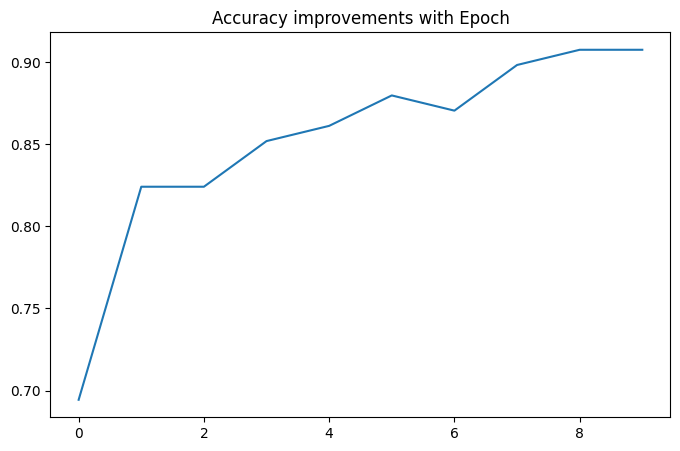

In [31]:
VERBOSE=1
BATCH_SIZE=16
EPOCHS=10
VALIDATION_SPLIT=0.2

history=model.fit(X_train,
          Y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT)


import matplotlib.pyplot as plt


pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

In [32]:
model.evaluate(X_test,Y_test)

1/1 [==============================] - 0s 46ms/step - loss: 0.2025 - accuracy: 0.8667


[0.20252864062786102, 0.8666666746139526]

In [33]:
model.save("iris_save")
loaded_model = keras.models.load_model("iris_save")
loaded_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17539 (68.51 KB)
Trainable params: 17539 (68.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
